Solving the system of differential equations:
$$
\frac{d^2\mathbf{x}}{dt^2}=k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}\mathbf{x}
$$
gives
$$
\mathbf{x} = \mathbb{cosh}(t\sqrt{\mathbf{A}})
$$
where:
$$
\mathbf{A} = k\begin{bmatrix}
-1/m_1 & 1/m_1\\
1/m_2 & (-1/m_1 -1/m_2)\\
\end{bmatrix}
$$
and you can generalize this system for n springs

In [31]:
using Plots, FFTW, Random, Distributions

d = Normal(0, 1)
td = truncated(d, 0.0, Inf)

spring_n = 3
spring_ms = rand(td, spring_n)
spring_ks = rand(td, spring_n)

A = zeros(spring_n,spring_n)

for i ∈ 1:spring_n
    for j ∈ 1:spring_n
        if i == 1 && j == 1
            A[i,j] = -(spring_ks[1])/spring_ms[1]
        
        elseif i == j
            A[i,j] = -spring_ks[j]/spring_ms[j-1] -(spring_ks[j])/spring_ms[j]

        elseif i == j-1
            A[i,j] = (spring_ks[j])/spring_ms[i]
        
        elseif i == j+1
            A[i,j] = (spring_ks[j])/spring_ms[j]
        
        end
    end
end
print(A)

t = range(0, 100, length=1000)

initial = rand(d, 3)

x = [cosh(i * sqrt(A)) * initial for i ∈ t]

x_vals = [[real(i[j]) for i ∈ x] for j ∈ 1:spring_n]

plot(t, [x_vals])

[-0.7575516251434765 0.12835783167932285 0.0; 0.7575516251434765 -0.6168977765408847 1.4041639963722907; 0.0 0.48853994486156194 -2.2392234875669983]

3-element Vector{Vector{Float64}}:
 [-0.6709538417079123, -0.6692675921580155, -0.6642363504727333, -0.6559420055842156, -0.64451894826827, -0.6301509897312874, -0.6130671556972717, -0.5935364607339939, -0.5718617928273536, -0.5483730601578609  …  -0.11521272199107346, -0.1363250153296194, -0.1583695944805263, -0.1813420550800809, -0.20519885812538124, -0.2298567410650622, -0.2551932639836223, -0.2810484867664595, -0.3072277428376514, -0.3335054455851003]
 [-1.3341413092803112, -1.34561743079663, -1.3797157543572882, -1.4354547064334595, -1.5112266079439198, -1.604839320573033, -1.7135730343593738, -1.8342507266082924, -1.9633204684031582, -2.096947448491153  …  -1.3814093468923594, -1.531873626352479, -1.6586639650275037, -1.7604306808640702, -1.8364572219411421, -1.8866771162756628, -1.911673995998626, -1.912664689842253, -1.8914658181214974, -1.8504447534330783]
 [-1.8593921493659904, -1.8418354693098742, -1.7896145519754336, -1.7040650985803223, -1.587374689847028, -1.4425259565848

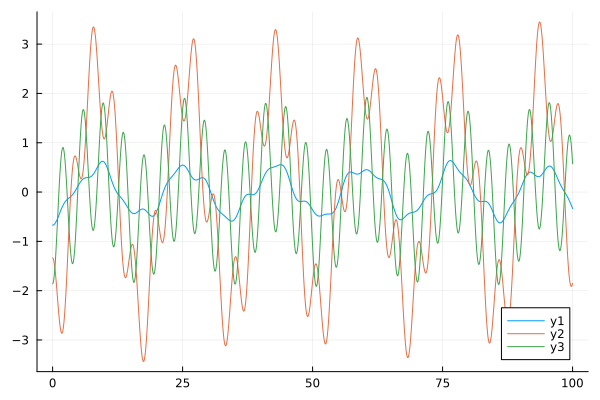

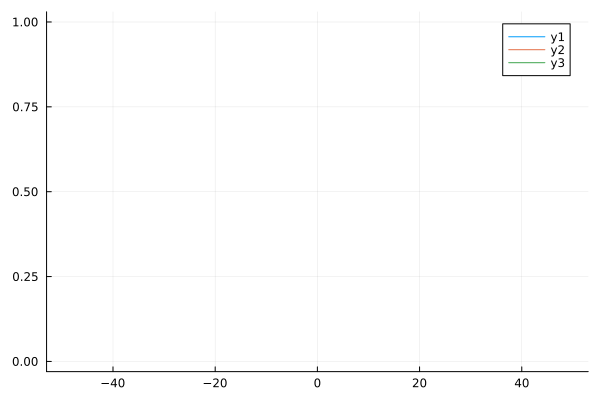

In [3]:
fft_x_vals = [fftshift(fft(i)) for i ∈ x_vals]

mag_fft_x_vals = [[abs(i) for i ∈ j] for j ∈ fft_x_vals]
arg_fft_x_vals = [[angle(i) for i ∈ j] for j ∈ fft_x_vals]

plot([i-t[end]/2+t[begin]/2 for i ∈ t], mag_fft_x_vals)

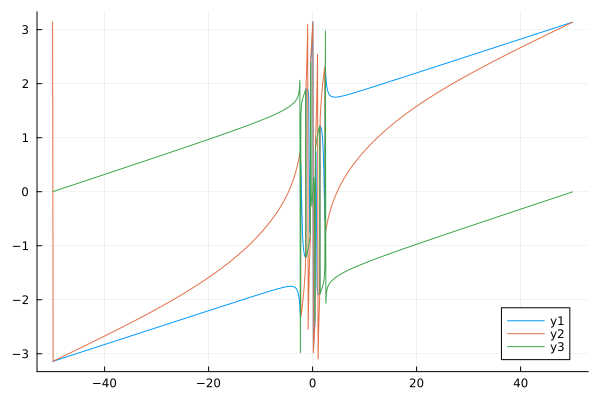

In [7]:
plot([i+t[begin]/2-t[end]/2 for i ∈ t], [arg_fft_x_vals])

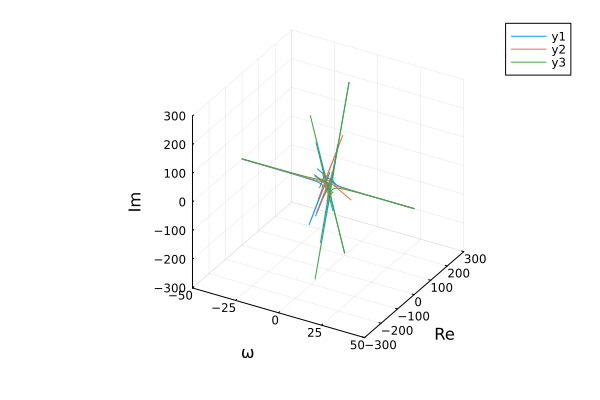

In [5]:
re_fft_x_vals = [[real(i) for i ∈ j] for j ∈ fft_x_vals]
im_fft_x_vals = [[imag(i) for i ∈ j] for j ∈ fft_x_vals]

plot(
    [i - (t[end]-t[begin])/2 for i ∈ t],
    re_fft_x_vals,
    im_fft_x_vals,
    xlimit=(t[begin] * 3/2 - t[end]/2,t[end]/2-t[begin]/2),
    ylimit=(-300,300),
    zlimit=(-300,300),
    xlabel="ω",
    ylabel="Re",
    zlabel="Im",
)